Computer Vision Object Dectection
Computer Vision API를 사용해서 이미지속에 있는 사물을 인식하는 데모 입니다.

네트워크 통신을 위해서 requests 패키지를 import 합니다.

In [21]:
import requests



이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.

matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.




In [22]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [3]:
import json


Subscription Key와 접속에 필요한 URL을 설정합니다.



In [23]:
subscription_key = '62d95ac668424bc69d4fa7fcc937e2b5'
vision_base_url = 'https://labuser79computervision.cognitiveservices.azure.com/vision/v2.0/'

In [6]:
analyze_url = vision_base_url + 'analyze'

분석에 사용되는 이미지를 확인합니다

In [24]:
image_url = ' https://www.lottehotel.com/content/dam/lotte-hotel/lotte/seoul/overview/e-concierge/shopping-performance/190320-4-768-ove-LTSE.jpg.thumb.768.768.jpg'

In [14]:
con = requests.get(image_url).content
byte = BytesIO(con)
image = Image.open(byte)

#image = Image.open(BytesIO(requests.get(image_url).content))

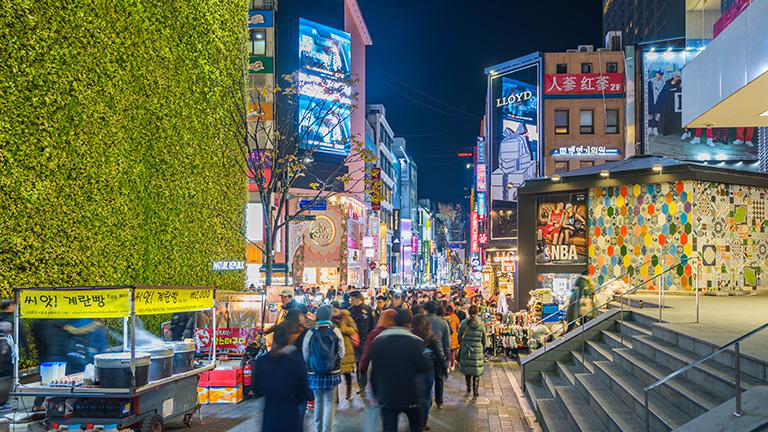

In [25]:
image

In [16]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params  = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': image_url}

In [28]:
response = requests.post(analyze_url, headers = headers, params = params, json = data) #get or post

NameError: ignored

In [29]:
result

NameError: ignored

In [30]:
image_caption = result['description']['caption'][0]['text']

NameError: ignored

In [31]:
image_caption

NameError: ignored

object Detection (분석)

In [32]:
objectDetection_url = vision_base_url + 'detect'

In [34]:
image_url = 'https://mblogthumb-phinf.pstatic.net/MjAyMDA5MDdfMjQ1/MDAxNTk5NDY1MjUxMjM4.zbBfDyquP67Utlw2d6pFOtHqnJyfkukH3PTDgDTg8Zkg.qQWiX02sgIaExMrU-guWXKDRsmnGBBxeS_bz2Ioy8YUg.PNG.vet6390/%EA%B0%95%EC%95%84%EC%A7%80_%EA%B3%A0%EC%96%91%EC%9D%B4_%ED%95%A8%EA%BB%98_%ED%82%A4%EC%9A%B0%EA%B8%B0.PNG?type=w800'

In [36]:
image = Image.open(BytesIO(requests.get(image_url).content))

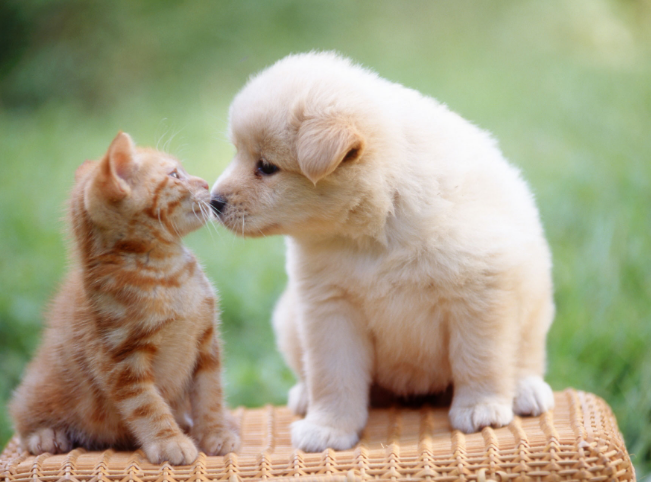

In [37]:
image

In [38]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params  = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': image_url}

In [39]:
response = requests.post(objectDetection_url, headers = headers,params = params, json = data)

In [41]:
result = response.json()
result

{'objects': [{'rectangle': {'x': 211, 'y': 35, 'w': 349, 'h': 407},
   'object': 'dog',
   'confidence': 0.543,
   'parent': {'object': 'mammal',
    'confidence': 0.929,
    'parent': {'object': 'animal', 'confidence': 0.949}}},
  {'rectangle': {'x': 8, 'y': 125, 'w': 237, 'h': 347},
   'object': 'cat',
   'confidence': 0.824,
   'parent': {'object': 'mammal',
    'confidence': 0.89,
    'parent': {'object': 'animal', 'confidence': 0.891}}}],
 'requestId': '264f447e-881a-4812-957b-551c95571ecf',
 'metadata': {'height': 482, 'width': 651, 'format': 'Png'}}

In [51]:
from PIL import Image, ImageDraw, ImageFont
draw =ImageDraw.Draw(image)

In [57]:
#bounding Box를 위한 함수
def DrawBox(detectData) :
  objects = detectData['objects']

  for obj in objects:
    print(obj)

    rect = obj['rectangle']
    print(rect)

    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x,y),(x+w,y+h)),outline='red')
    objectName = obj['object']
    draw.text((x,y),objectName,fill='red')

In [58]:
DrawBox(result)

{'rectangle': {'x': 211, 'y': 35, 'w': 349, 'h': 407}, 'object': 'dog', 'confidence': 0.543, 'parent': {'object': 'mammal', 'confidence': 0.929, 'parent': {'object': 'animal', 'confidence': 0.949}}}
{'x': 211, 'y': 35, 'w': 349, 'h': 407}
{'rectangle': {'x': 8, 'y': 125, 'w': 237, 'h': 347}, 'object': 'cat', 'confidence': 0.824, 'parent': {'object': 'mammal', 'confidence': 0.89, 'parent': {'object': 'animal', 'confidence': 0.891}}}
{'x': 8, 'y': 125, 'w': 237, 'h': 347}


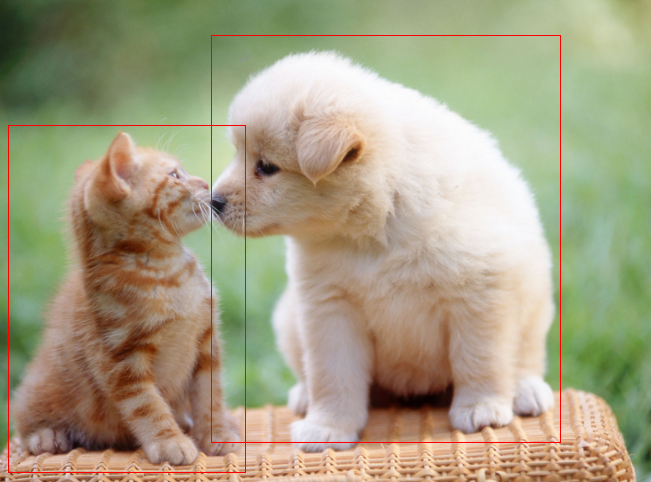

In [56]:
image